# **Setup**
讀取環境變數、初始化語言模型（LLM）

In [1]:
! pip install dotenv langgraph

  Using cached dotenv-0.9.9-py2.py3-none-any.whl.metadata (279 bytes)
  Using cached langgraph-0.3.24-py3-none-any.whl.metadata (7.7 kB)
  Using cached python_dotenv-1.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached langchain_core-0.3.50-py3-none-any.whl.metadata (5.9 kB)
  Using cached langgraph_checkpoint-2.0.24-py3-none-any.whl.metadata (4.6 kB)
  Using cached langgraph_prebuilt-0.1.7-py3-none-any.whl.metadata (5.0 kB)
  Using cached langgraph_sdk-0.1.61-py3-none-any.whl.metadata (1.8 kB)
  Using cached xxhash-3.5.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (12 kB)
  Using cached langsmith-0.3.23-py3-none-any.whl.metadata (15 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached PyYAML-6.0.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached typing_extensions-4.13.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached ormsgpack-1.9.1-cp313-cp313-macosx_10_12_x86_64.m

In [2]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage
from langchain_core.messages import SystemMessage
import requests
from langgraph.graph import StateGraph
from langgraph.graph import START, END

from langgraph.prebuilt import tools_condition 
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

In [3]:
import os

if "COLAB_GPU" in os.environ:
    from google.colab import userdata
    from google.colab.userdata import SecretNotFoundError

    def get_secret(key, default=''):
        try:
            return userdata.get(key)
        except SecretNotFoundError:  # 捕獲密鑰不存在的錯誤
            return default

    os.environ["OPENAI_API_KEY"] = get_secret('OPENAI_API_KEY', '')
    os.environ["GOOGLE_API_KEY"] = get_secret('GOOGLE_API_KEY', '')
    os.environ["ANTHROPIC_API_KEY"] = get_secret('ANTHROPIC_API_KEY', '')
    os.environ["ARALIA_ENDPOINT"] = get_secret('ARALIA_ENDPOINT', '')
    os.environ["ARALIA_TOKEN"] = get_secret('ARALIA_TOKEN', '')
else:
    from dotenv import load_dotenv
    load_dotenv()


### 使用OpenAI模型
* OpenAI / Gemini / Claude擇一
* 環境變數需有OPENAI_API_KEY

In [4]:
! pip install langchain_openai

  Using cached langchain_openai-0.3.12-py3-none-any.whl.metadata (2.3 kB)
  Using cached openai-1.70.0-py3-none-any.whl.metadata (25 kB)
  Using cached tiktoken-0.9.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.7 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached jiter-0.9.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached regex-2024.11.6-cp313-cp313-macosx_11_0_arm64.whl.metadata (40 kB)
Using cached langchain_openai-0.3.12-py3-none-any.whl (61 kB)
Using cached openai-1.70.0-py3-none-any.whl (599 kB)
Using cached tiktoken-0.9.0-cp313-cp313-macosx_11_0_arm64.whl (1.0 MB)
Using cached distro-1.9.0-py3-none-any.whl (20 kB)
Using cached jiter-0.9.0-cp313-cp313-macosx_11_0_arm64.whl (318 kB)
Using cached regex-2024.11.6-cp313-cp313-macosx_11_0_arm64.whl (284 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [5]:
#Initializing the language model with the OpenAI model
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini")

In [6]:
llm.invoke([HumanMessage(content="hi")])

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5', 'id': 'chatcmpl-BIGukr7UlXvVcVQubL6vZF2FDrR5M', 'finish_reason': 'stop', 'logprobs': None}, id='run-b2f93e52-b66e-4279-b8c5-7019a3fd5df3-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### 使用Google Gemini模型
* OpenAI / Gemini / Claude擇一
* 環境變數需有GOOGLE_API_KEY

In [ ]:
! pip install langchain_google_genai

In [ ]:
#Initializing the language model with the Gemini model
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [ ]:
from langchain_core.messages import HumanMessage
llm.invoke([HumanMessage(content="hi")])

### 使用Claude語言模型
* OpenAI / Gemini / Claude擇一
* 環境變數需有ANTHROPIC_API_KEY

In [ ]:
! pip install langchain_anthropic

In [ ]:
#Initializing the language model with the Claude model
from langchain_anthropic import ChatAnthropic
llm = ChatAnthropic(model='claude-3-opus-20240229')

In [ ]:
llm.invoke([HumanMessage(content="hi")])

# **Air Pollution Worker**
建立專門查詢各縣市空氣品質的專家

## 建立工具
以Aralia地標的Share Link作為工具

In [7]:
def air_pollution_search(city: str, date_from: str, date_end: str) -> str:
    """取得台灣某城市某時間區間的空氣污染指數
    Args:
        city: 縣市名稱 eg. 臺北市, 高雄市
        date_from: 查詢起始日期 eg. 2023-01-01
        date_end: 查詢結束日期 eg. 2023-01-31
    """
    url = f"https://tw-air.araliadata.io/api/public/share-link/kBUh4mdWi7S9FUW7GkYuiE/chart-data?value1={date_from}&value2={date_end}&value3={city}"
    headers = {
        'Authorization': 'dpkey_924de2f995ff7d9b79e824284e6b56aa1256259daea8f6c736a4b6b4955ebc0e'
    }
    response = requests.request("GET", url, headers=headers)
    data = response.json()['data']['list']
    result = ""
    for i in data:
        result += f"{i['x0']}的AQI是{i['y0']}\n"
    return result

In [8]:
# 測試tool
air_pollution_search("臺北市","2023-10-01","2023-10-31")

'臺北市的AQI是59.1294964028777\n'

## 建立Worker
以Prompt的方式塑造此Worker的性格，同時賦予Worker工具

In [9]:
# 讓LLM知道工具的使用方法
air_pollution_tools = [air_pollution_search]
llm_with_air_pollution_tools = llm.bind_tools(air_pollution_tools)

In [10]:
# 撰寫Worker的System Prompt
sys_msg = SystemMessage(content="你是空氣品質調查員。可以查詢台灣各縣市的空氣品質指數。如果您沒有確切的資訊，請委婉地回答自己沒辦法回答。")
def air_pollution_worker(state: MessagesState):
    return {"messages": [llm_with_air_pollution_tools.invoke([sys_msg] + state["messages"])]}

## 建立Graph測試Worker
* 將工具和Worker串連起來，並且用ReAct的方式，讓Worker可以使用多次工具，直到問題足夠被回答為止。
* 這邊所串連起來的Graph只是作為測試用途，後面才會編排出最終的Graph(Langgraph沒有合併subgraph的功能)

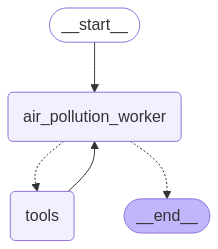

In [11]:
# Graph
builder = StateGraph(MessagesState)

# Add nodes
builder.add_node("air_pollution_worker", air_pollution_worker)
builder.add_node("tools", ToolNode(air_pollution_tools))

# Add edges
builder.add_edge(START, "air_pollution_worker")
builder.add_conditional_edges(
    "air_pollution_worker",
    tools_condition,  # 用來判斷目前節點的輸出是否需要呼叫工具
)
builder.add_edge("tools", "air_pollution_worker")  # 使用完工具回到Worker
air_pollution_graph = builder.compile()

# Display the graph
display(Image(air_pollution_graph.get_graph(xray=True).draw_mermaid_png()))

In [12]:
# 測試
messages = [HumanMessage(content="請查詢臺北市2023年10月的空氣污染指數")]
messages = air_pollution_graph.invoke({"messages": messages})
#Displaying the response
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

請查詢臺北市2023年10月的空氣污染指數
================================== Ai Message ==================================
Tool Calls:
  air_pollution_search (call_KZhwjhAdgIkjqhGYCdQD30VI)
 Call ID: call_KZhwjhAdgIkjqhGYCdQD30VI
  Args:
    city: 臺北市
    date_from: 2023-10-01
    date_end: 2023-10-31
================================= Tool Message =================================
Name: air_pollution_search

臺北市的AQI是59.1294964028777

================================== Ai Message ==================================

臺北市在2023年10月的空氣污染指數（AQI）為59.13，顯示空氣品質良好。


# **Traffic Worker**
建立專門查詢交通事故的專家

## 建立工具
以Aralia地標的Share Link作為工具

In [13]:
def traffic_acc_search(city: str, date_from: str, date_end: str) -> str:
    """取得台灣某城市某時間區間的各類別交通事故死亡及受傷人數
    Args:
        city: 縣市名稱 eg. 臺北市, 高雄市
        date_from: 查詢起始日期 eg. 2023-01-01
        date_end: 查詢結束日期 eg. 2023-01-31
    """
    url = f"https://tw-traffic.araliadata.io/api/public/share-link/ZTHqBMDofoYyJDsnWa5Lcj/chart-data?value1={date_from}&value2={date_end}&value3={city}"
    headers = {
        'Authorization': 'dpkey_6c24200efc6813ee268ffa8aa00d2f8c66dd3d3a08d52c3f5915b0a024087106'
    }
    response = requests.request("GET", url, headers=headers)
    data = response.json()['data']['list']
    result = ""
    for i in data:
        result += f"{city}發生肇事因素「{i['x0']}」的死亡人數是{i['y0']}受傷人數是{i['y1']}\n"
    return result

In [14]:
# 測試tool
traffic_acc_search("臺北市","2017-03-15","2023-03-20")

'臺北市發生肇事因素「未注意車前狀態」的死亡人數是96受傷人數是109\n臺北市發生肇事因素「搶越行人穿越道」的死亡人數是66受傷人數是43\n臺北市發生肇事因素「違反號誌管制或指揮」的死亡人數是59受傷人數是80\n臺北市發生肇事因素「不明原因肇事」的死亡人數是39受傷人數是95\n臺北市發生肇事因素「超速失控」的死亡人數是32受傷人數是39\n臺北市發生肇事因素「未依規定讓車」的死亡人數是25受傷人數是33\n臺北市發生肇事因素「其他引起事故之違規或不當行為」的死亡人數是22受傷人數是31\n臺北市發生肇事因素「酒醉(後)駕駛失控」的死亡人數是18受傷人數是12\n臺北市發生肇事因素「變換車道或方向不當」的死亡人數是14受傷人數是9\n臺北市發生肇事因素「右轉彎未依規定」的死亡人數是11受傷人數是10\n'

## 建立Worker
以Prompt的方式塑造此Worker的性格，同時賦予Worker工具

In [15]:
# 讓LLM知道工具的使用方法
traffic_tools = [traffic_acc_search]
llm_with_traffic_tools = llm.bind_tools(traffic_tools)

In [16]:
# 撰寫Worker的System Prompt
sys_msg = SystemMessage(content="你是交通專家，可以查詢台灣各縣市的交通事故發生原因造成的死傷人數。請你回答本於數據回答，如果您沒有確切的資訊，請委婉地回答自己沒辦法回答。")
def traffic_worker(state: MessagesState):
    return {"messages": [llm_with_traffic_tools.invoke([sys_msg] + state["messages"])]}

## 建立Graph測試Worker
* 將工具和Worker串連起來，並且用ReAct的方式，讓Worker可以使用多次工具，直到問題足夠被回答為止。
* 這邊所串連起來的Graph只是作為測試用途，後面才會編排出最終的Graph(Langgraph沒有合併subgraph的功能)

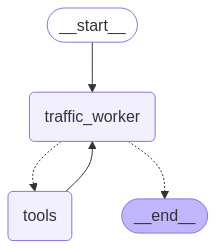

In [17]:
# Graph
builder = StateGraph(MessagesState)

# Add nodes
builder.add_node("traffic_worker", traffic_worker)
builder.add_node("tools", ToolNode(traffic_tools))

# Add edges
builder.add_edge(START, "traffic_worker")
builder.add_conditional_edges(
    "traffic_worker",
    tools_condition,  # 用來判斷目前節點的輸出是否需要呼叫工具
)
builder.add_edge("tools", "traffic_worker")  # 使用完工具回到Worker
air_pollution_graph = builder.compile()

# Display the graph
display(Image(air_pollution_graph.get_graph(xray=True).draw_mermaid_png()))


In [18]:
# 測試
messages = [HumanMessage(content="2017年在新北市發生的交通事故死亡人數有多少？")]
messages = air_pollution_graph.invoke({"messages": messages})
#Displaying the response
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

2017年在新北市發生的交通事故死亡人數有多少？
================================== Ai Message ==================================
Tool Calls:
  traffic_acc_search (call_fPxym2jXFJrIvyvsItAQeYIT)
 Call ID: call_fPxym2jXFJrIvyvsItAQeYIT
  Args:
    city: 新北市
    date_from: 2017-01-01
    date_end: 2017-12-31
================================= Tool Message =================================
Name: traffic_acc_search

新北市發生肇事因素「未注意車前狀態」的死亡人數是30受傷人數是50
新北市發生肇事因素「未依規定減速」的死亡人數是17受傷人數是8
新北市發生肇事因素「未依規定讓車」的死亡人數是13受傷人數是12
新北市發生肇事因素「違反號誌管制或指揮」的死亡人數是9受傷人數是10
新北市發生肇事因素「未依規定行走行人穿越道、地下道、天橋而穿越道路」的死亡人數是9受傷人數是9
新北市發生肇事因素「違反特定標誌(線)禁制」的死亡人數是7受傷人數是11
新北市發生肇事因素「酒醉(後)駕駛失控」的死亡人數是6受傷人數是26
新北市發生肇事因素「變換車道或方向不當」的死亡人數是5受傷人數是3
新北市發生肇事因素「左轉彎未依規定」的死亡人數是4受傷人數是12
新北市發生肇事因素「超速失控」的死亡人數是4受傷人數是8

================================== Ai Message ==================================

在2017年，新北市的交通事故死亡人數總計為多項肇事因素的合計，具體如下：

- 未注意車前狀態：30人
- 未依規定減速：17人
- 未依規定讓車：13人
- 違反號誌管制或指揮：9人


# **Multi-agent**
使用一個supervisor負責分流使用者的問題給不同的worker進行處理

## 定義Supervisor Node

In [19]:
supervisor_sys_msg = SystemMessage(content="""
你是Supervisor，負責依據使用者需求判斷要呼叫哪個 Worker。
若與空氣品質相關，回傳 'Worker: air_pollution_worker'
若與交通事故相關，回傳 'Worker: traffic_worker'
否則請委婉回答使用者，你並沒有回答的能力。'
""")

def supervisor(state: MessagesState):

    messages = [supervisor_sys_msg] + state["messages"]
    result = llm.invoke(messages)
    return {"messages": [result]}

In [20]:
# 測試
messages = [HumanMessage(content="請查詢臺北市2023年10月的空氣污染指數")]
supervisor({"messages": messages})["messages"][0].content


'Worker: air_pollution_worker'

## 最終的Graph

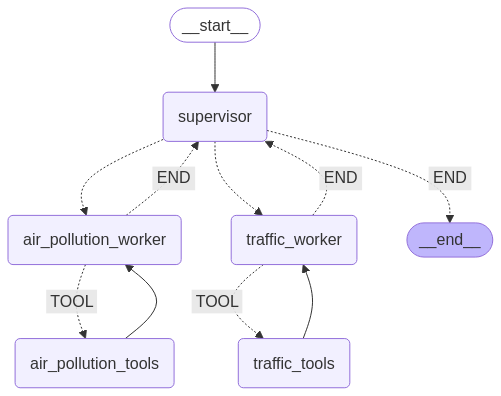

In [21]:
def route_on_worker(state):
    """根據最後一則訊息決定要派給哪個 worker"""
    last_msg = state["messages"][-1]
    content = last_msg.content if hasattr(last_msg, "content") else str(last_msg)

    if content == "Worker: air_pollution_worker":
        return "air_pollution_worker"
    elif content == "Worker: traffic_worker":
        return "traffic_worker"
    else:
        return "END"
    

def route_on_tools(state):
    """根據最後一則 AI 訊息判斷是否有要使用工具"""
    last_msg = state["messages"][-1]
    
    if hasattr(last_msg, "tool_calls") and last_msg.tool_calls:
        return "TOOL"
    else:
        return "END"




builder = StateGraph(MessagesState)

# == Nodes ==
builder.add_node("supervisor", supervisor)
builder.add_node("air_pollution_worker", air_pollution_worker)
builder.add_node("air_pollution_tools", ToolNode(air_pollution_tools))
builder.add_node("traffic_worker", traffic_worker)
builder.add_node("traffic_tools", ToolNode(traffic_tools))



# == Edges ==
# START -> supervisor
builder.add_edge(START, "supervisor")



# supervisor -> air_pollution_worker / traffic_worker
builder.add_conditional_edges(
    "supervisor",
    route_on_worker,
    { "air_pollution_worker": "air_pollution_worker", "traffic_worker": "traffic_worker","END": END }
)



# supervisor <- air_pollution_worker <-> air_pollution_tools
# builder.add_conditional_edges("air_pollution_worker", tools_condition, ["air_pollution_tools", "supervisor"])
builder.add_conditional_edges(
    "air_pollution_worker", 
    route_on_tools,
    { "TOOL": "air_pollution_tools", "END": "supervisor" }   
)
builder.add_edge("air_pollution_tools", "air_pollution_worker")


# supervisor <- traffic_worker <-> traffic_tools
# builder.add_conditional_edges("traffic_worker", tools_condition, ["traffic_tools", "supervisor"])
builder.add_conditional_edges(
    "traffic_worker", 
    route_on_tools,
    { "TOOL": "traffic_tools", "END": "supervisor" }   
)
builder.add_edge("traffic_tools", "traffic_worker")


# compile
multi_graph = builder.compile()

# Display the graph
display(Image(multi_graph.get_graph(xray=True).draw_mermaid_png()))



In [22]:
# 測試
messages = [HumanMessage(content="請查詢臺北市2023年10月的空氣污染指數")]
messages = multi_graph.invoke({"messages": messages})
#Displaying the response
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

請查詢臺北市2023年10月的空氣污染指數
================================== Ai Message ==================================

Worker: air_pollution_worker
================================== Ai Message ==================================
Tool Calls:
  air_pollution_search (call_oMso9XiWDvdrdxvbnK805q9A)
 Call ID: call_oMso9XiWDvdrdxvbnK805q9A
  Args:
    city: 臺北市
    date_from: 2023-10-01
    date_end: 2023-10-31
================================= Tool Message =================================
Name: air_pollution_search

臺北市的AQI是59.1294964028777

================================== Ai Message ==================================

臺北市2023年10月的空氣污染指數(AQI)為59.13。這個數值表示空氣品質良好。
================================== Ai Message ==================================

請問有其他問題需要幫忙嗎？
